# Plot word vectors
##### See [visualize.py](https://github.com/devmount/GermanWordEmbeddings/blob/master/visualize.py) script from [GermanWordEmbeddings](https://devmount.github.io/GermanWordEmbeddings/)

The following code gives an example of how to reduce dimensionality of word vectors with PCA or t-SNE.
With two dimensions left, the words can be plotted as points in a two-dimensional graph.

You need [gensim](https://radimrehurek.com/gensim/install.html), [matplotlib](http://matplotlib.org/faq/installing_faq.html#how-to-install) and [scikit-learn](http://scikit-learn.org/dev/install.html) for this script to work.

In [1]:
%matplotlib inline
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

The following function is used to compute PCA/t-SNE representation of words and returns a configured and styled plot.

In [2]:
# function draw_words
# ... reduces dimensionality of vectors of given words either with PCA or with t-SNE and draws the words into a diagram
# @param word2vec model     to visualize vectors from
# @param list     words     list of word strings to visualize
# @param bool     pca       use PCA (True) or t-SNE (False) to reduce dimensionality 
# @param bool     alternate use different color and label align for every second word
# @param bool     arrows    use arrows to connect related words (items that are next to each other in list)
# @param float    x1        x axis range (from)
# @param float    x2        x axis range (to)
# @param float    y1        y axis range (from)
# @param float    y2        y axis range (to)
# @param string   title     for diagram
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

Now that we have all tools to process word vectors, we need to load the `word2vec` language model that contains our high-dimensional word vectors.

In [3]:
# get trained model
model = gensim.models.Word2Vec.load_word2vec_format("my.model", binary=True)

With the model and the `draw_words()` function a list of words can be plotted. When 2 word classes are given (like the first 3 following examples), put them alternately in the list and set the `alternate` parameter of the function to `True`. That procuces arrows and improved label positions.

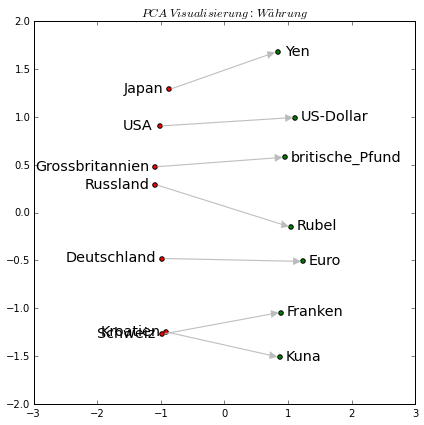

In [4]:
# plot currencies
words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
draw_words(model, words, True, True, True, -3, 3, -2, 2, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

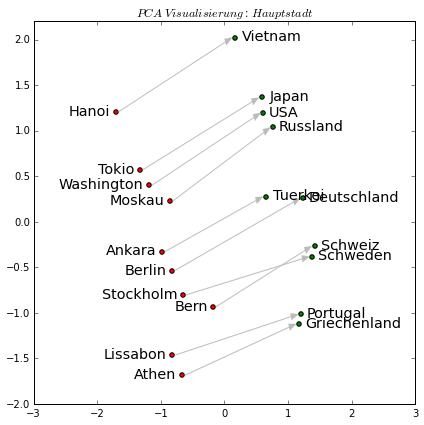

In [5]:
# plot capitals
words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Tuerkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
draw_words(model, words, True, True, True, -3, 3, -2, 2.2, r'$PCA\ Visualisierung:\ Hauptstadt$')

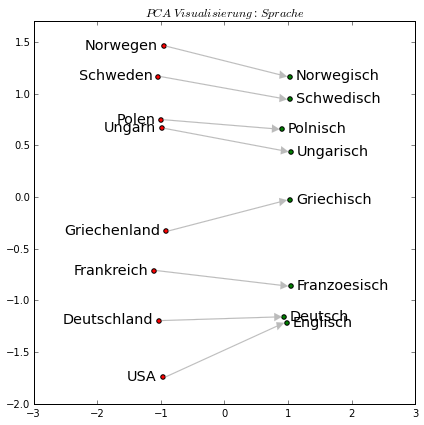

In [6]:
# plot language
words = ["Deutschland","Deutsch","USA","Englisch","Frankreich","Franzoesisch","Griechenland","Griechisch","Norwegen","Norwegisch","Schweden","Schwedisch","Polen","Polnisch","Ungarn","Ungarisch"]
draw_words(model, words, True, True, True, -3, 3, -2, 1.7, r'$PCA\ Visualisierung:\ Sprache$')

The next example shows related words to a given word, using the `most_similar()` function of gensim.

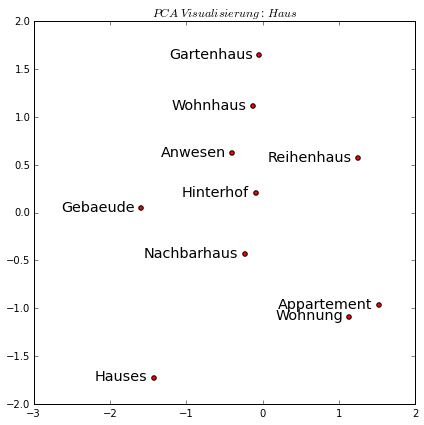

In [7]:
# plot related words to 'house'
matches = model.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
draw_words(model, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')

Finally an example for capturing correct gender of given name.

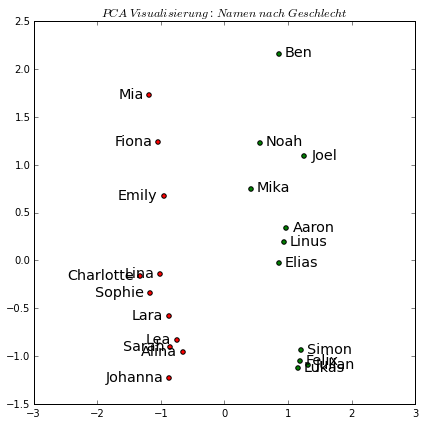

In [8]:
# plot name
words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]
draw_words(model, words, True, True, False, -3, 3, -1.5, 2.5, r'$PCA\ Visualisierung:\ Namen\ nach\ Geschlecht$')